# Neale diseases genes (Pascal) and vascular phenotypes genes (Pascal)
## Unfinished!

###### First version 17/06/2022
###### Latest modif 14/12/2022

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
from matplotlib.colors import LogNorm, Normalize

DATE = datetime.now().strftime("%Y-%m-%d")

In [20]:
p_value_min = 5.7  # -math.log10(0.05/len(x))
ventile_num='Zekavat'
#date_used='2022_11_23' #'2022_08_17'
#directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/'+str(date_used)+'_'+str(ventile_num) +'/'
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'
directory_diseases_neale_pascal = '/HDD/data/ukbb/disease_sumstats/VARIANTS/'
#'/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/'  #2022_11_23_covar_fix/'
#save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'


type_phenots='main' # supplementary, main
if type_phenots=='main':
    ##### MAIN PHENOTYPES
    MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
    all_files = list(MAIN_LABELS.split(","))
    all_files_new = list(MAIN_NAMES.split(","))
    #df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_main_vZekavat.csv')

elif type_phenots=='supplementary':
    #### SUPPLEMENTARY PHENOTYPES
    SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'
    all_files = list(SUPPLEMENTARY_LABELS.split(","))
    all_files_new = list(SUPPLEMENTARY_NAMES.split(","))
    #df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_suplementary_vZekavat.csv')

diseases_traits = {
        '4079_irnt':'DBP',
        '4080_irnt':'SBP',
        '102_irnt':'PR',
        '2976_irnt':'Age diabetes',
        '30760':'HDL cholesterol',
        '1558':'Alcohol intake freq',
        '21021_irnt':'Pulse wave ASI',
        '30780':'LDL direct', ##
        '30870':'Triglycerides', ##
        '20002_1094': 'DVT', 
        '5843_1':'Myopia 1',
        '20116_0': 'Smoking status: Never', 
        '20116_2': 'Smoking status: Current', ##
        '2443': 'Diabetes', 
        '6148_4': 'Cataract', ##
        '1717':'Skin colour',
        '6150_1': 'Heart attack', 
        '6150_2': 'Angina', 
        '6150_3': 'Stroke', 
        '6150_4': 'High blood pressure'
        } 

diseases_traits_all = {
        '4079_irnt':'DBP',
        '4080_irnt':'SBP',
        '102_irnt':'PR',
        '2976_irnt':'Age diabetes',
        '30760':'HDL cholesterol',
        '1558':'Alcohol intake freq',
        '21021_irnt':'Pulse wave ASI',
        '30780':'LDL direct', ##
        '30870':'Triglycerides', ##
        '20002_1094': 'DVT', 
        '5843_1':'Myopia 1',

        '20116_0': 'Smoking status: Never', 
        '20116_2': 'Smoking status: Current', ##
        '2443': 'Diabetes', 
        '6148_4': 'Cataract', ##
        '1717':'Skin colour',
        '6150_1': 'Heart attack', 
        '6150_2': 'Angina', 
        '6150_3': 'Stroke', 
        '6150_4': 'High blood pressure'
        } 
#neale_csv_name='11_10_2022_diseases_genes.csv'

In [21]:

os.chdir(directory_diseases_neale_pascal)
l_diseases_all=[]

### compute df with Neale diseases' genes

for file in glob.glob("*__gene_scores"):
    #if file.endswith('qc_only_rs_notna_mod_variants'): ## TO DO confirmar
        #print(file)
    
    df = pd.read_csv(directory_diseases_neale_pascal+file, delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    pheno, b = file.split(".gwas.imputed_v3.both_sexes.tsv__gene_scores")
    aux, pheno_name = pheno.split("only_rs_notna_mod_variants_")
    
    data={
    'pheno':  pheno,
    'name_pheno': pheno_name,
    'N genes': len(df_significant),
    'names': df_significant['gen'].to_list()
    }
    l_diseases_all.append(data)

df_genes_neale =pd.DataFrame(l_diseases_all)

df_genes_neale


#######df_genes_neale= pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/'+neale_csv_name, converters={'names': pd.eval})

#df_genes_neale['liststring'] = [''.join(map(str, l)) for l in df_genes_neale['names']]
#df_genes_neale['names'].iloc[4][2]
#list_pheno_neale=['4079_irnt'] #list(df_genes_neale['pheno'])
#['4080_irnt', '102_irnt', '4056_irnt', '5610_3', '4079_irnt', '1717', '3894_irnt']

#df_genes_neale_red = df_genes_neale[df_genes_neale["name_pheno"].isin(list_pheno_neale)]
#df_genes_neale_red['pheno_name'] = ['SBP_irnt', 'PR_irnt', 'Stroke_irnt', 'Presbyopia_3', 'DBP_irnt', 'Skin_color', 'heart_attack_irnt']

,pheno,name_pheno,N genes,names
0,qc_only_rs_notna_mod_variants_6150_4,6150_4,784,"[FGF5, NPR3, KCNK3, SH2B3, ATXN2, ATP2B1, AC02..."
1,only_rs_notna_mod_variants_5843_1,5843_1,1,[EXOSC4]
2,only_rs_notna_mod_variants_1717,1717,468,"[CDK10, RP11-368I7.4, DPEP1, CHMP1A, SPATA33, ..."
3,qc_only_rs_notna_mod_variants_6148_4,6148_4,0,[]
4,qc_only_rs_notna_mod_variants_20116_0,20116_0,226,"[NCAM1, CADM2, NT5C2, AC064865.1, C10orf32, C1..."
5,only_rs_notna_mod_variants_4080_irnt,4080_irnt,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
6,qc_only_rs_notna_mod_variants_6150_2,6150_2,45,"[RP11-145E5.5, C9orf53, CDKN2B, CDKN2A, CLPTM1..."
7,qc_only_rs_notna_mod_variants_20002_1094,20002_1094,35,"[SURF6, SLC19A2, RP1-206D15.3, CCDC181, F5, AT..."
8,qc_only_rs_notna_mod_variants_6150_3,6150_3,0,[]
9,only_rs_notna_mod_variants_5855_1,5855_1,0,[]


In [5]:
df_aux=pd.DataFrame([])
l_diseases_intersection= []
df_file_form=pd.DataFrame(columns=all_files, index = list(df_genes_neale['name_pheno']))
j=-1
for file in all_files:
    j=j+1
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__gene_scores', delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    #phenotype_genes=df_significant['gen'].to_list()
    set_pheno=set(df_significant['gen'])
    print(file)
    for i in range(len(df_genes_neale)):
        if len(df_genes_neale['names'].iloc[i]) !=0: 
            set_neale=set(df_genes_neale['names'].iloc[i])
           # print(file, df_genes_neale['name_pheno'].iloc[i])
            print(df_genes_neale['name_pheno'].iloc[i], len(set_neale),len(set_pheno & set_neale))
            #print(len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Num of genes in pheno, neale, intersection: ',len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Name of the genes intersection: ', set_pheno & set_neale, '\n')
            df_file_form.iloc[i][j]=len(set_pheno & set_neale) ## RELEVANT ONE
            
            data_intersection={
            'name_pheno': file,
            'name_disease':  df_genes_neale['name_pheno'].iloc[i],
            'len(set_neale)': len(set_neale),
            'len(set_pheno_set_neale)': len(set_pheno & set_neale),
            'name_genes_inters': set_pheno & set_neale
            }
            l_diseases_intersection.append(data_intersection)
        else:
            continue
        #df_data_intersection=pd.DataFrame(data_intersection)

    print('\n')
#print(l_diseases_intersection)
df_genes_neale_intersection = pd.DataFrame(l_diseases_intersection)
    

mean_angle_taa
6150_4 784 3
5843_1 1 0
1717 468 0
20116_0 226 0
4080_irnt 959 0
6150_2 45 1
20002_1094 35 0
2443 240 0
6150_1 44 0
4079_irnt 910 1
4079_raw 905 1
102_raw 884 2
21021_irnt 3 0
1558 276 1
102_irnt 907 2
4080_raw 838 0
2976_irnt 106 0


mean_angle_tva
6150_4 784 2
5843_1 1 0
1717 468 0
20116_0 226 0
4080_irnt 959 0
6150_2 45 1
20002_1094 35 0
2443 240 0
6150_1 44 0
4079_irnt 910 1
4079_raw 905 1
102_raw 884 2
21021_irnt 3 0
1558 276 1
102_irnt 907 2
4080_raw 838 0
2976_irnt 106 0


tau1_vein
6150_4 784 4
5843_1 1 0
1717 468 0
20116_0 226 1
4080_irnt 959 15
6150_2 45 0
20002_1094 35 0
2443 240 11
6150_1 44 0
4079_irnt 910 15
4079_raw 905 15
102_raw 884 22
21021_irnt 3 0
1558 276 0
102_irnt 907 22
4080_raw 838 12
2976_irnt 106 3


tau1_artery
6150_4 784 10
5843_1 1 0
1717 468 14
20116_0 226 1
4080_irnt 959 26
6150_2 45 0
20002_1094 35 2
2443 240 15
6150_1 44 1
4079_irnt 910 34
4079_raw 905 33
102_raw 884 14
21021_irnt 3 0
1558 276 0
102_irnt 907 17
4080_raw 838 24
2976_irnt 

In [9]:

df_file_form_2 = df_file_form.dropna()

df_file_form_2 = df_file_form_2.T
#df_file_proper_format.dtypes
df_file_form_2= df_file_form_2.astype(np.int64)

def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

df_file_form_2= rename_col_index(df_file_form_2, diseases_traits.keys(), diseases_traits.values(), all_files, all_files_new)
#df_file_form_2[[list(diseases_traits.values())]]


In [17]:
#[list(diseases_traits.values())]
#df_file_form_2[list(diseases_traits.values())]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'High blood pressure'),
  Text(1.5, 0, 'Myopia 1'),
  Text(2.5, 0, 'Skin colour'),
  Text(3.5, 0, 'Smoking status: Never'),
  Text(4.5, 0, 'SBP'),
  Text(5.5, 0, 'Angina'),
  Text(6.5, 0, 'DVT'),
  Text(7.5, 0, 'Diabetes'),
  Text(8.5, 0, 'Heart attack'),
  Text(9.5, 0, 'DBP'),
  Text(10.5, 0, '4079_raw'),
  Text(11.5, 0, '102_raw'),
  Text(12.5, 0, 'Pulse wave ASI'),
  Text(13.5, 0, 'Alcohol intake freq'),
  Text(14.5, 0, 'PR'),
  Text(15.5, 0, '4080_raw'),
  Text(16.5, 0, 'Age diabetes')])

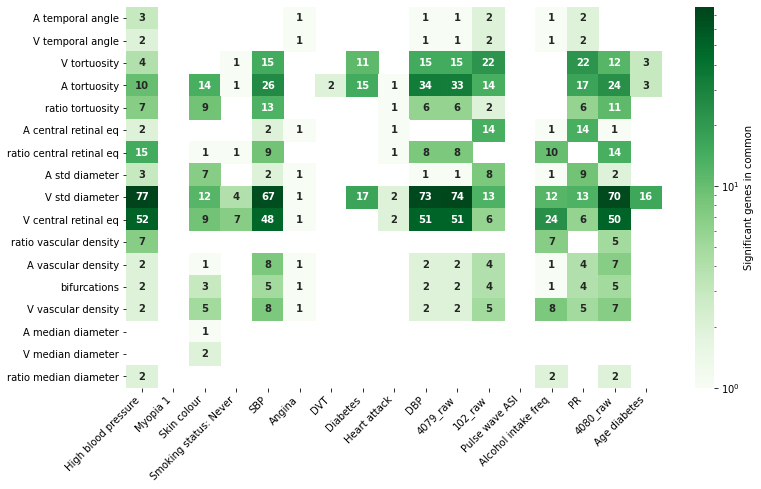

In [19]:
plt.rcParams['font.size'] = '10'
#figsize_val_2=(5, 7)
figsize_val_2=(12, 7)
df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits.values())]
fig, ax = plt.subplots(figsize=figsize_val_2)

fig1 = sns.heatmap(df_file_proper_format_plots, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots).min().max(), 
            vmax=abs(df_file_proper_format_plots).max().max(), 
            cmap='Greens',alpha=1.0, cbar_kws={'label': 'Significant genes in common'}, 
            norm=LogNorm())
plt.xticks(rotation=45, ha='right')

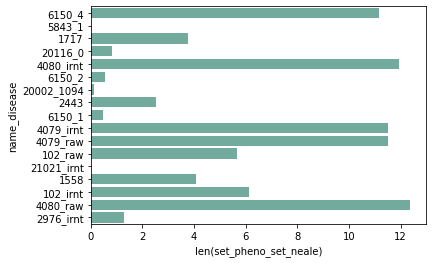

In [ ]:
#df_genes_neale_intersection['len(set_pheno_set_neale)']
# plot a bar chart
sns.barplot(
    x="len(set_pheno_set_neale)", 
    y="name_disease", 
    data=df_genes_neale_intersection, 
    ci=None, 
    color='#69b3a2');

In [ ]:
#df_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']